In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [9]:
import glob

# Define the file pattern and the number of surfaces to load
file_pattern = '/home/haaaaron/suN-gauge-twist-surface/arg_surface_*.txt'
n_surfaces_to_load = 10  # Specify the number of surfaces to load

# Initialize a list to store all surfaces
# Initialize a dictionary to store surfaces for each file
all_surfaces = {}

# Loop over all matching files
for file_path in glob.glob(file_pattern):
    # Extract the unique identifier from the file name using the wildcard
    identifier = file_path.split('_')[-1].split('.')[0] + '_' + file_path.split('_')[-2]

    # Load the data from the file
    data = np.loadtxt(file_path)

    # Initialize a list to store surfaces for this file
    surfaces_for_file = []

    # Split the data into multiple surfaces based on the reset condition (0 0 float)
    current_surface = []
    for line in data:
        if line[0] == 0 and line[1] == 0 and current_surface:
            surfaces_for_file.append(np.array(current_surface))
            current_surface = []
        current_surface.append(line)

    # Append the last surface if it exists
    if current_surface:
        surfaces_for_file.append(np.array(current_surface))

    # Store the surfaces in the dictionary with the identifier as the key
    all_surfaces[identifier] = surfaces_for_file

print(f"Loaded surfaces for {len(all_surfaces)} files.")

print(f"Loaded {len(all_surfaces[list(all_surfaces.keys())[0]])} surfaces.")

Loaded surfaces for 5 files.
Loaded 1000 surfaces.


In [10]:
all_surfaces_keys = list(all_surfaces.keys())
all_surfaces_keys

['30_30', '5_5', '20_20', '10_10', '70_70']

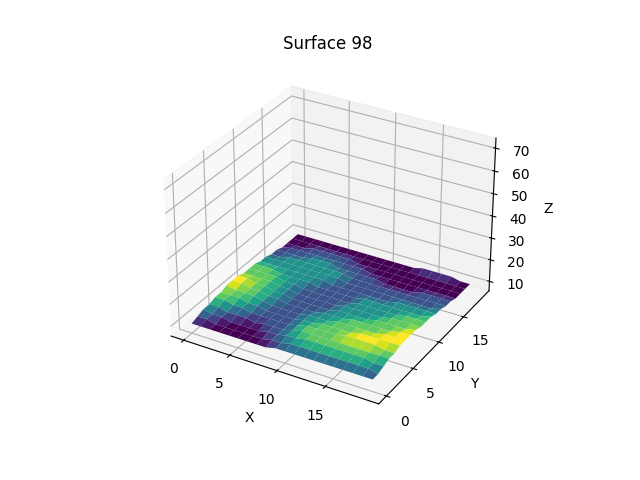

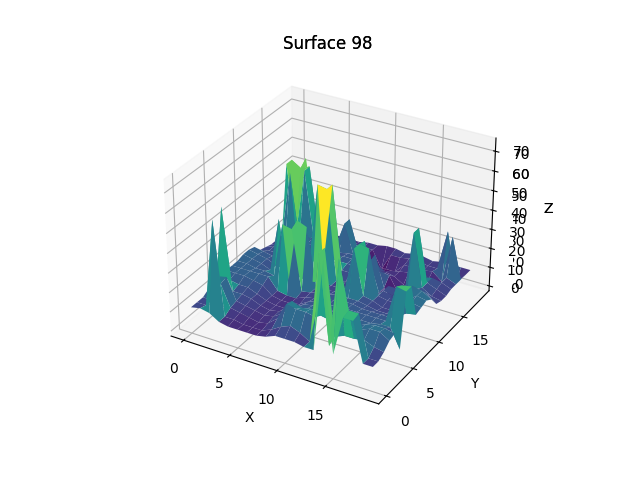

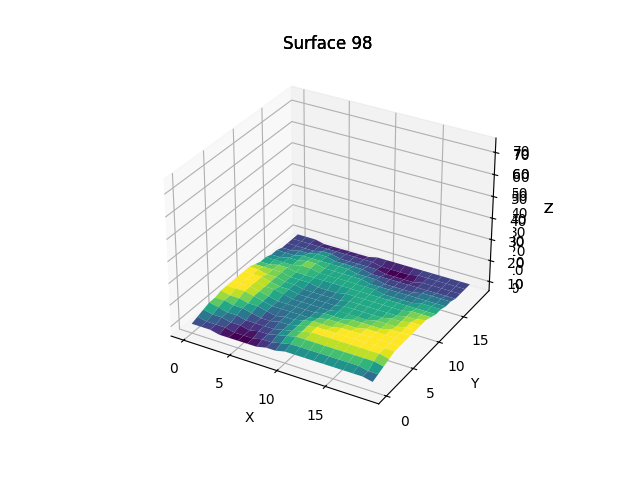

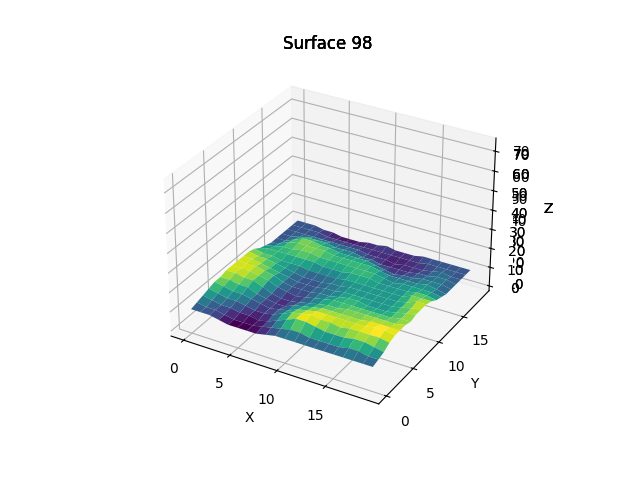

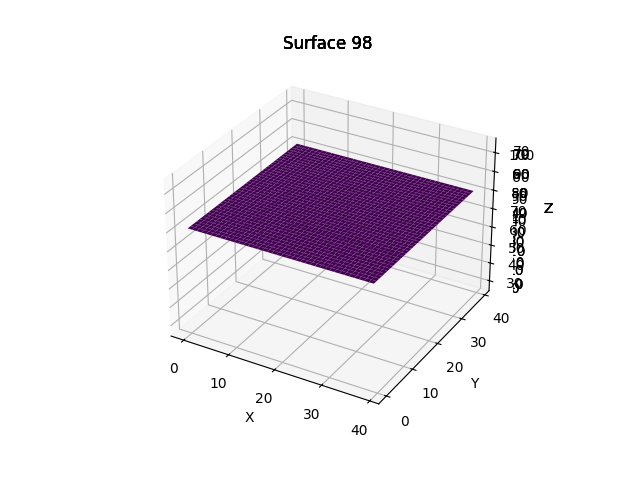

In [ ]:
%matplotlib widget
fig = plt.figure()

def animate_surfaces(start, end, identifier, save_path=None):
    """
    Animates the surfaces in the given range [start, end) for a specific identifier.

    Parameters:
    - start: int, the starting index of the surfaces to animate.
    - end: int, the ending index (exclusive) of the surfaces to animate.
    - identifier: str, the identifier of the surfaces to animate.
    - save_path: str, optional, the file path to save the animation. If None, the animation is not saved.
    """
    ax = fig.add_subplot(111, projection='3d')

    # Get the surfaces for the specified identifier
    surfaces = all_surfaces[identifier]

    # Calculate the global min and max z values across all surfaces
    z_min = min(surface[:, 2].min() for surface in surfaces)
    z_max = max(surface[:, 2].max() for surface in surfaces)

    def update(frame):
        ax.clear()
        data = surfaces[frame]
        x = data[:, 0]
        y = data[:, 1]
        z = data[:, 2]

        x_unique = np.unique(x)
        y_unique = np.unique(y)
        x_grid, y_grid = np.meshgrid(x_unique, y_unique)
        z_grid = z.reshape(len(y_unique), len(x_unique))

        surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f"Surface {frame}")
        ax.set_zlim(z_min, z_max)  # Fix the z-axis limits

    ani = FuncAnimation(fig, update, frames=range(start, end), interval=100)

    # Save the animation if a save path is provided
    if save_path:
        ani.save(save_path, writer='ffmpeg')

    plt.show()
    plt.close('all')
# Example usage|
for key in all_surfaces_keys:
    animate_surfaces(0, 99,key,save_path=f'../videos/surface_animation_average_arg_{key}.mp4')


In [27]:
plt.close('all')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
frame=80
# Calculate the global min and max z values across all surfaces
z_min = min(surface[:, 2].min() for surface in surfaces)
z_max = max(surface[:, 2].max() for surface in surfaces)

ax.clear()
data = surfaces[frame]
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

x_unique = np.unique(x)
y_unique = np.unique(y)
x_grid, y_grid = np.meshgrid(x_unique, y_unique)
z_grid = z.reshape(len(y_unique), len(x_unique))

surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f"Surface {frame}")
ax.set_zlim(z_min, z_max)  # Fix the z-axis limits\
    
plt.show()

In [ ]:
# Calculate the average z value for each surface
average_z_values = [surface[:, 2].mean() for surface in surfaces]

# Plot the time history of the average z values
plt.figure()
plt.plot(range(len(average_z_values)), average_z_values, marker='o')
plt.xlabel('Surface Index')
plt.ylabel('Average Z Value')
plt.title('Time History of Average Z Value')
plt.grid(True)
plt.show()